# The Traveling Salesman Problem

Il problema del commesso viaggiatore consiste nel determinare quale sia il percorso più breve che unisce un particolare insieme di punti. Il vincolo che il commesso viaggiatore deve rispettare è quello di passare esattamente una volta in ogni città, tornando poi al punto di partenza. La soluzione può ovviamente variare in base a cosa si intende per "breve". Da un punto di vista matematica l'affermazione si traduce nella definizione della funzione che, considerato un percorso, ne restituisce il costo. Per questo problema si possono considerare distanze semplici o distanze al quadrato:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$
e
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

Nelle parti che seguiranno verrà sempre usata $L^{(1)}$. Ogni possibile percorso è identificato da una vettore di interi, contenente le "etichette" che identificano una città. Avere un vettore del tipo $[0,3,17,...]$ significa che si parte dalla città 0, si va alla terza, poi alla diciassettesima e così via...

## Algoritmo genetico

Il problema viene risolto implementando un algoritmo genetico che funziona schematicamente nel seguente modo:

1. Si genera un insieme di percorsi (cromosomi), detto popolazione, e si ordina mettendo ai primi posti i percorsi che restituiscono un costo minore. 
2. Utlizzando un operatore di selezione, si estraggono coppie di individui che si mescoleranno tra loro (crossover) e muteranno individualmente (permutazione,shift,inversione), in modo da creare una nuova popolazione. La selezione avviene secondo un criterio "Darwinista", ovvero prediligendo i cromosomi più "prestanti" secondo la formula: $j= int(M \times r^p)+1$, con r numero random in $[0,1)$ e p parametro opportuno.
3. Salva la nuova generazione e riparti dal punto 1.

Con queste indicazioni ogni permutazione ciclica rappresenterebbe lo stesso percorso. Per evitare questa situazione facciamo in modo che la città con etichetta "0" sia sempre la città di partenza. In questo modo la degenerazione è ridotta a 2 e contempla solo il percorso attraversato in senso orario oppure antiorario.



## Dettagli del codice

Il codice è stato pensato per separare il più possibile tutte quelle strutture che sono caratteristiche di un qualsiasi problema risolvibile con algoritmo genetico da quelle che sono invece caratteristiche del TSP. Nello specifico ho implementato quattro classi differenti, le prime due sono specifiche del problema e le ultime due (quasi) del tutto generali:

1. Classe PointCoord: la classe rappresenta un punto nella spazio, contiene metodi per estrarre e fissare le coordinate di un punto e metodi per calcolare la distanza tra due punti differenti.
2. Classe TSP: la classe è pensata per rappresentare il problema del commesso viaggiatore. Contiene un vettore di PoinCoord che rappresentano il percorso attraverso le diverse città. Ho previsto un costruttore in grado di creare un insieme di città distribuite causalmente su una circonferenza oppure all'interno di una regione quadrata e contiene metodi che calcolano le funzioni associate a un particolare percorso.
3. Classe Cromosoma: è la classe più corposa del codice. Contiene un vettore (cromosoma) le cui componenti (geni) rappresentano la particolare configurazione in cui si trova il problema. In questa classe sono implementate le varie mutazioni, tra queste troviamo: permutazione di due geni, traslazione di n posizioni di m geni, permutazione di blocchi di geni e inversione di un gruppo di geni. La classe ha anche un metodo di check rispetto alle condizioni che deve soddisfare ogni cromosoma (primo gene tenuto fisso e mai geni che si ripetono all'interno dello stesso cromosoma).
4. Classe Popolazione: la classe contiene come data membro un vettore di cromosomi (la popolazione appunto), un metodo che fa evolvere la popolazione in una generazione successiva e alcuni metodi di supporto. Tra questi troviamo alcuni algoritmi di ordinamento, i quali ordinano la popolazione in modo che i cromosomi più prestanti siano in cima alla popolazione. La classe implementa anche il Crossover tra due diversi geni, fondamentale all'interno del metodo che rappresenta l'evoluzione della popolazione secondo le tre fasi fondamentali precedentemente enunciate.

NOTA sull'evoluzione: il Crossover è chiamato con una probabilità del 50%, le mutazioni invece quasi tutte con probabilità $\sim 10$% e agiscono su parti del cromosoma scelte in modo casuale. Invece $p=2.5$. In sintesi:

1. Parametro selezione $p=3.0$
2. Proababilità Crossover $P_c=0.5$
3. Probabilità permutazione coppia $P_p=0.15$
4. Probabilità di shift $P_s=0.1$
5. Probabilità permutazione gruppo $P_{pg}=0.1$
6. Probabilità di inversione $P_i=0.1$

Mentre la classe Cromosoma è totalmente indipendente dalle classi precedenti, la classe Popolazione ha un solo metodo dipendente dal problema specifico. Nel momento in cui si vuole ordinare la popolazione è infatti necessario valutare il fitness dei cromosomi tramite una funzione di costo, che per forza di cose è specifica del problema considerato. Per tutto il resto la classe è assolutamente generale e non dovrebbe avere bisogno di modifiche quando applicata ad un altro problema genetico. 

Ho inoltre implementato funzioni esterne in grado di stampare su file il fitness migliore e la media della metà dei fitness migliori di una popolazione.

## Esercizio 09.1

In questo esercizio generiamo un insieme di 34 città disposte casualmente lungo una circonferenza e applicando l'algoritmo genetico cerchiamo il percorso più breve. Nello specifico è stata usata una popolazione composta da 300 cromosomi. La popolazione è stata fatta evolvere per 300 generazioni.

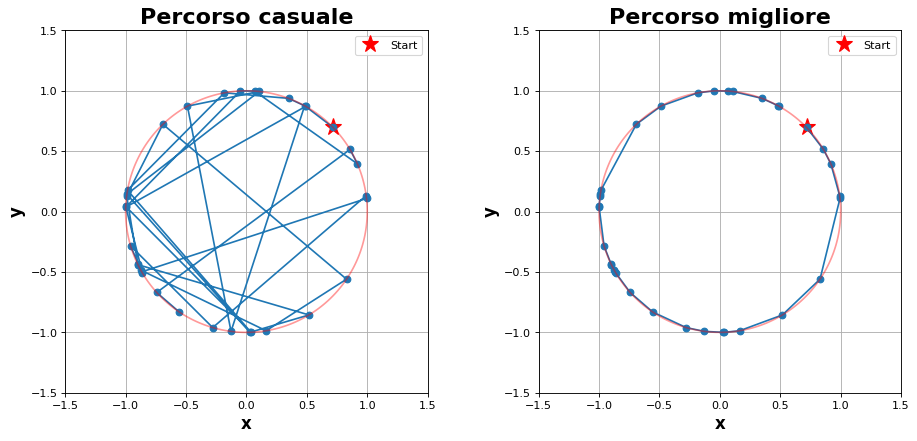

In [88]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


figure(figsize=(14, 6), dpi=80)
gen = ["1","300"]
tipo = ["casuale","migliore"]

for i in range (2):
    plt.subplot(1,2,i+1)
    x,y = np.loadtxt("c++/output/Circle/300/Cities/Output.gen"+gen[i]+".txt", usecols=(0,1), unpack=True)
    plt.plot(x[0],y[0], marker ="*", color = "r", markersize = 16, label = "Start", linestyle = "")
    plt.plot(x, y, marker = "o", linestyle = "-")
    plt.ylabel('y', fontsize = 15, fontweight = "bold")
    plt.xlabel('x', fontsize = 15, fontweight = "bold")
    plt.grid(True)
    plt.title('Percorso '+tipo[i], fontsize = 20, fontweight = "bold")
    plt.legend()

    x = np.linspace(-1.0, 1.0, 100)
    y = np.linspace(-1.0, 1.0, 100)
    X, Y = np.meshgrid(x,y)
    F = X**2 + Y**2 - 1
    plt.contour(X,Y,F,[0], colors = "r", alpha = 0.4)

    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.gca().set_aspect('equal', adjustable='box')

plt.show()



Dal secondo grafico risulta evidente che l'algoritmo trova il percorso di minore distanza, ovvero composto da punti percorsi ordinatamente lunog la circonferenza. Confrontiamo ora l'evoluzione della fitness (miglior valore e media della prima metà di valori migliori) per varie generazioni per una popolazione di 300 cromosomi rispetto a una di 1000.

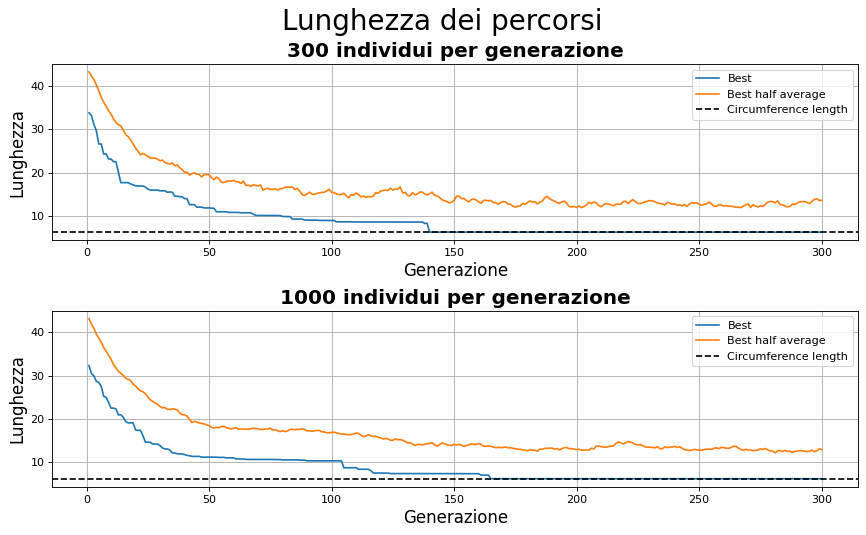

In [78]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(13, 7), dpi=80)
plt.suptitle("Lunghezza dei percorsi\n", fontsize = 25)

indivs =["300", "1000"]

for i in range(0,2):
    plt.subplot(2,1,i+1)
    gen,best = np.loadtxt("c++/output/Circle/"+indivs[i]+"/Output.BestFitness.txt", usecols=(0,1), unpack='true')
    plt.plot(gen, best, marker = "", label = "Best") 
    bestave = np.loadtxt("c++/output/Circle/"+indivs[i]+"/Output.BestAvFitness.txt", usecols=(1), unpack='true')
    plt.plot(gen, bestave, marker = "", label = "Best half average") 
    plt.ylabel('Lunghezza', fontsize =15)
    plt.xlabel('Generazione', fontsize =15)
    plt.grid(True)
    plt.axhline(y=2*np.pi, color = 'k', linestyle = '--', label = "Circumference length")
    plt.title(indivs[i]+' individui per generazione', fontsize = 18, fontweight = "bold")
    plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()


Notiamo che l'ingrandimento della popolazione non influisce particolarmente nella convergenza verso la soluzione. Proabilmente i vincoli del problema lo rendono abbastanza semplice da poter essere risolti agilmente anche con una popolazione più piccola. Per quanto riguarda la velocità di convergenza risulta più comodo agire sui parametri che definiscono l'evoluzione. Ad esempio, in presenza di problemi piuttosto semplici come questo, può essere comodo ridurre le probabilità di mutazione e aumentare il parametro p. Si perde così in ergodicità, fatto non drammatico quando la funzione di costo non è caratterizzata da troppi minimi locali, e si guadagna in velocità di convergenza.

Facciamo ora lo stesso con 34 città organizzate casualmente all'interno di un quadrato di lato unitario.

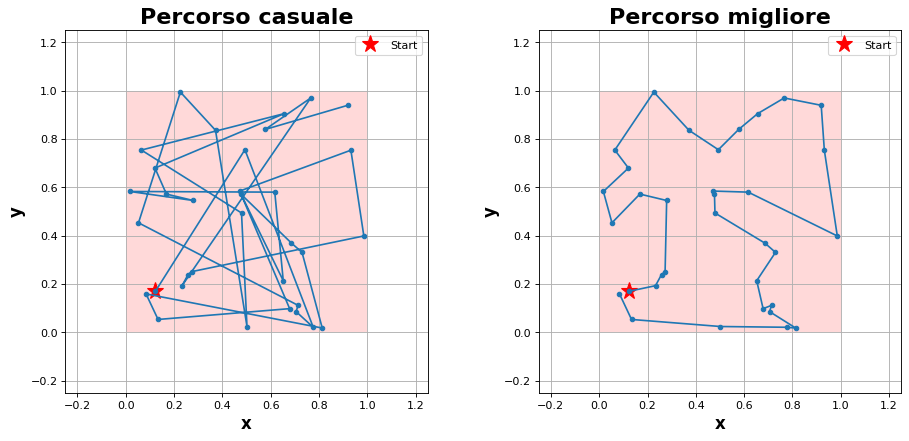

In [89]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


figure(figsize=(14, 6), dpi=80)
gen = ["1","300"]
tipo = ["casuale","migliore"]

for i in range (2):
    plt.subplot(1,2,i+1)
    x,y = np.loadtxt("c++/output/Square/1000/Cities/Output.gen"+gen[i]+".txt", usecols=(0,1), unpack='true')
    plt.plot(x[0],y[0], marker ="*", color = "r", markersize = 16, label = "Start", linestyle = "")
    plt.plot(x, y, marker = "o", markersize = 4, linestyle = "-")
    plt.ylabel('y', fontsize = 15, fontweight = "bold")
    plt.xlabel('x', fontsize = 15, fontweight = "bold")
    plt.grid(True)
    plt.title('Percorso '+tipo[i], fontsize = 20, fontweight = "bold")
    plt.legend()

    rectangle = plt.Rectangle((0,0), 1, 1, fc='r', alpha = 0.15)
    plt.gca().add_patch(rectangle)

    plt.xlim(-0.25, 1.25)
    plt.ylim(-0.25, 1.25)
    plt.gca().set_aspect('equal', adjustable='box')

plt.show()

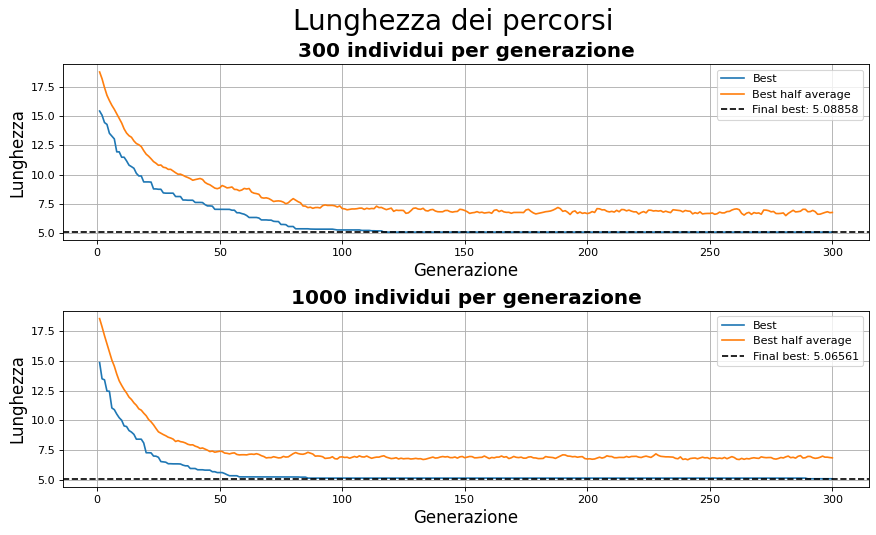

In [63]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(13, 7), dpi=80)
plt.suptitle("Lunghezza dei percorsi\n", fontsize = 25)

indivs =["300","1000"]

for i in range(0,2):
    # using indivs[i] individuals per generation
    plt.subplot(2,1,i+1)
    gen,best = np.loadtxt("c++/output/Square/"+indivs[i]+"/Output.BestFitness.txt", usecols=(0,1), unpack='true')
    plt.plot(gen, best, marker = "", label = "Best") 
    bestave = np.loadtxt("c++/output/Square/"+indivs[i]+"/Output.BestAvFitness.txt", usecols=(1), unpack='true')
    plt.plot(gen, bestave, marker = "", label = "Best half average") 
    plt.ylabel('Lunghezza', fontsize =15)
    plt.xlabel('Generazione', fontsize =15)
    plt.grid(True)
    plt.title(indivs[i]+' individui per generazione', fontsize = 18, fontweight = "bold")
    plt.axhline(y=best[299], color = "k", linestyle = "--", label = "Final best: "+str(best[299]))
    plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()

In questo caso vediamo che la popolazione di 1000 cromosomi si comporta meglio rispetto a quello di 300. Infatti converge più velocemente verso il percorso migliore, trovando una configurazione leggermente migliore rispetto alla propria controparte di 300 cromosomi.